## UK 다른 데이터셋도 SAVE와 같이 밤~새벽에 전기사용량이 많은가?

### REFIT 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame()
for i in range(1, 11):
    path = f'D:/ISP/3. 데이터/ENERGY/REFIT/Processed_Data_CSV/House_{i}.csv'
    data = pd.read_csv(path)

    data.set_index('Time', inplace=True)
    data.index = pd.to_datetime(data.index)

    # 8초 데이터를 1시간 데이터로
    time = []
    arr = []

    start_date = pd.to_datetime('2013-10-09 13:00:00')
    end_date = pd.to_datetime('2013-10-09 14:00:00')
    while True:
        time.append(start_date)
        arr.append(np.nanmedian(data.loc[start_date:end_date,'Aggregate'], axis=0) / 1000)

        start_date = start_date + pd.Timedelta('1 hour')
        end_date = end_date + pd.Timedelta('1 hour')

        if start_date > pd.to_datetime('2014-07-01 00:00:00'):
            break
    df[f'energy_{i}'] = arr

df['Time'] = time

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
df = df.iloc[11:-1,:].reset_index(drop = True)
df.set_index('Time', inplace=True)

df_arr = []
for i in range(10):
    df_arr.append(np.nanmean(df.iloc[:,i].values.reshape(-1, 24), axis=0))

df_arr = np.array(df_arr)

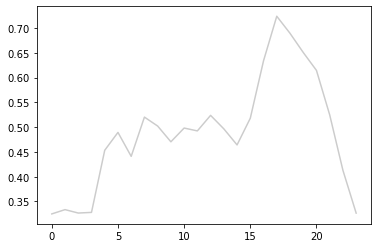

In [3]:
plt.plot(df_arr.mean(axis=0), color = 'k', alpha = 0.2)
plt.show()